<a href="https://colab.research.google.com/github/MinsooKwak/Project/blob/main/nlp_project_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section4 : NLP project (감성분류 모델)

## 0. Background, 시나리오

### 1. 배경

In [1]:
### 배경 및 데이터 선정 이유

### 2. 시나리오

맞춤형 티 서비스를 제공하는 회사에 데이터사이언티스트로 부임하게 되었다. Tea 회사의 마케팅 팀장은 코로나 이후 매출이 줄어들었다며 새로운 서비스의 제공과 변화가 필요하다 말했다. 이에 나는 코로나라는 위기의 상황을 또 다른 기회로 삼을 수 있을 것이라 가정하며 코로나 상황에서 인간의 감성을 터치할 것을 제안하였다. 자신의 일상을 쉽게 터놓지 못하는 사람들이 자신의 상황을 언어로서 표현하도록 하고 (현재는 글, 추후 음성과 결합 가능) 감성을 분석해 맞춤형 티 서비스를 제공하는 것이다. 이로써 소비자는 자신의 감성을 부수적으로 케어 받을 수 있으며 티 서비스 역시 제공 받을 수 있다. 마케팅 팀장은 아이디어를 받아들였고, 나는 일상대화 데이터를 이용하여 딥러닝을 이용한 감성 분석에 착수했다. 

In [2]:
# 대화 예시 ; 추후 PPT에서 활용해서 대화 카톡형식으로 구성

M: "코로나 이후 매출이 줄어들어 걱정이예요. 매출을 올릴 수 있는 또 다른 서비스와 변화가 필요해요." </br> </br>
DS: "코로나라는 상황이 어려운 상황이지만, 또 기회로 작용할 수 있을 것 같아요.<br> 코로나라는 상황 속에 사람과 사람 사이의 관계의 단절이 발생하는 상황을 활용해보는 건 어떨까요? 
</br> 코로나로 인해 활동량도 줄고 사람간의 관계가 줄어들면서 점차 자신의 감정을 터놓지 못하는 현상이 늘어나고 있어요. 따라서 자신의 상황을 비공개적으로 터놓을 수 있도록 하고, 감성을 분석해 맞춤형 티 서비스를 제공하면 어떨까요?" <br> </br>

### 0. Data import

In [3]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/MyDrive/section4_project/nlp_dataset/감성대화/

/content/drive/MyDrive/section4_project/nlp_dataset/감성대화


In [6]:
import pandas as pd
import numpy as np

In [7]:
pwd

'/content/drive/MyDrive/section4_project/nlp_dataset/감성대화'

In [8]:
ls

AppleGothic.ttf               감성대화말뭉치_Validation.xlsx
감성대화말뭉치_Training.xlsx  wordcloud.jpg


1. Data frame : Train set, validation set

In [9]:
train_dataset = pd.read_excel('감성대화말뭉치_Training.xlsx')

In [10]:
validation_dataset = pd.read_excel('감성대화말뭉치_Validation.xlsx')

In [11]:
print(f'train data shape: {train_dataset.shape} \nvalidation data shape: {validation_dataset.shape}')

train data shape: (40879, 15) 
validation data shape: (5130, 15)


2. Row dataframe 

In [12]:
train_dataset.head(3)

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.


In [13]:
validation_dataset.head(3)

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,23093,청년,여성,"진로, 취업, 직장",해당없음,분노,툴툴대는,요즘 부모님과 많이 부딪혀.,어떤 일로 부딪히시나요?,난 하고 싶은 일이 있는데 부모님은 안정적인 일만 하라고 하셔. 내 마음대로 하지도...,부모님과의 충돌로 힘드시겠군요.,응. 그래도 난 내가 하고 싶은 일을 위해 노력할 거야.,자신이 하고 싶은 일을 목표로 하기로 하셨군요.,NaN,NaN
1,32848,청소년,남성,가족관계,해당없음,슬픔,비통한,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,어머니께서 집을 나가셨다니 정말 슬프셨겠어요. 좀 더 자세히 얘기해주시겠어요?,엄마도 엄마만의 인생이 있을 테니 가지 말라고 할 수가 없었어. 그래서 더 마음이 ...,정말 많이 답답하셨겠어요. 어떻게 하는 게 기분이 좀 풀릴까요?,일단 좀 자야겠어.,일단 휴식을 가질 생각이시군요.,NaN,NaN
2,35590,청소년,남성,학교폭력/따돌림,해당없음,불안,조심스러운,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,용기 있는 행동을 하셨네요. 마음이 어떠셨나요?,그런데 말을 하고 난 후 나도 괴롭힐까 봐 불안했어.,그랬군요. 지금 기분에서 벗어나기 위해 할 수 있는 일에는 무엇이 있을까요?,나는 옳은 일을 한 거라고 생각해. 나까지 괴롭힌다면 신고할 거야.,지금의 상황이 나의 방식으로써 잘 해결될 수 있기를 바라요.,NaN,NaN


## 1. 방향성 설정

AI-Hub에서 제공한 말뭉치 대화 데이터셋은 사람과 시스템 사이에 대화 내용이 담긴 데이터셋이다. </br> 연령, 성별, 상황과 신체 질환 여부를 포함하고 있으며 감정에 대한 분류 역시 담겨있다. </br> 또한 대화 상황으로 이뤄져 있으므로 사람과 시스템 응답이 번갈아 차례로 등장하고 있다. </br></br> 먼저, 연령, 성별, 상황키워드, 신체질환여부가 감정과 어떠한 상관성이 있는지 간략하게 파악해볼 것이다. </br> 그리고 본 분석 의도에 따라 상황에 따른 인간의 언어에 대한 감성분석을 목적으로 하기 때문에 </br> 감정과 사람의 문장에 대한 부분 추출하여 사용하고자 한다. 사람의 문장에 대한 부분안 합쳐 사용할 것이다. 

## 2. Dataframe 수정

사람문장과 시스템 문장을 병합해야 하는 이유: </br>
1. 결측치 처리
2. 본 프로젝트의 목적은 문장에 따른 감성분석으로 병합해서 사용해도 무관하다.

### 1) Row dataframe의 결측치 확인 

In [14]:
train_dataset.isnull().sum()

번호            0
연령            0
성별            0
상황키워드         0
신체질환          0
감정_대분류        0
감정_소분류        0
사람문장1         0
시스템응답1        0
사람문장2         0
시스템응답2        0
사람문장3      9820
시스템응답3     9820
사람문장4     39407
시스템응답4    39517
dtype: int64

In [15]:
validation_dataset.isnull().sum()

번호           0
연령           0
성별           0
상황키워드        0
신체질환         0
감정_대분류       0
감정_소분류       0
사람문장1        0
시스템응답1       0
사람문장2        0
시스템응답2       0
사람문장3     1256
시스템응답3    1256
사람문장4     4979
시스템응답4    4994
dtype: int64

결측치 제거

In [16]:
train_dataset.dropna(inplace=True)
validation_dataset.dropna(inplace=True)

train_dataset.isnull().sum()

번호        0
연령        0
성별        0
상황키워드     0
신체질환      0
감정_대분류    0
감정_소분류    0
사람문장1     0
시스템응답1    0
사람문장2     0
시스템응답2    0
사람문장3     0
시스템응답3    0
사람문장4     0
시스템응답4    0
dtype: int64

In [17]:
validation_dataset.isnull().sum()

번호        0
연령        0
성별        0
상황키워드     0
신체질환      0
감정_대분류    0
감정_소분류    0
사람문장1     0
시스템응답1    0
사람문장2     0
시스템응답2    0
사람문장3     0
시스템응답3    0
사람문장4     0
시스템응답4    0
dtype: int64

### 2) 사람문장과 시스템응답을 각기 병합

In [18]:
human_cols = ['사람문장1','사람문장2','사람문장3','사람문장4']
system_cols = ['시스템응답1','시스템응답2','시스템응답3','시스템응답4']

train_dataset['human_document'] =train_dataset[human_cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
validation_dataset['human_document']=validation_dataset[human_cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

train_dataset['system_document']= train_dataset[system_cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
validation_dataset['system_document']= validation_dataset[system_cols].apply(lambda row:' '.join(row.values.astype(str)), axis=1)

In [19]:
train_dataset.isnull().sum()

번호                 0
연령                 0
성별                 0
상황키워드              0
신체질환               0
감정_대분류             0
감정_소분류             0
사람문장1              0
시스템응답1             0
사람문장2              0
시스템응답2             0
사람문장3              0
시스템응답3             0
사람문장4              0
시스템응답4             0
human_document     0
system_document    0
dtype: int64

In [20]:
validation_dataset.isnull().sum()

번호                 0
연령                 0
성별                 0
상황키워드              0
신체질환               0
감정_대분류             0
감정_소분류             0
사람문장1              0
시스템응답1             0
사람문장2              0
시스템응답2             0
사람문장3              0
시스템응답3             0
사람문장4              0
시스템응답4             0
human_document     0
system_document    0
dtype: int64

병합된 feature들 (human_document, system_document)에는 결측치가 없는 것으로 나타났다. </br> 다음으로 필요한 부분만 추출하여 데이터프레임을 구성할 것이다.

### 3) 재구성한 dataframe

In [21]:
train_df = train_dataset[['번호','연령','성별','상황키워드','신체질환','감정_대분류','감정_소분류','human_document','system_document']]
validation_df = validation_dataset[['번호','연령','성별','상황키워드','신체질환','감정_대분류','감정_소분류','human_document','system_document']]

재구성한 train dataframe

In [22]:
train_df.head() 

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,human_document,system_document
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 ...,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요. 이 상황에서...
50,50412,노년,여성,재정,만성질환 유,당황,한심한,젊은 시절에 내가 했던 일이 이제 와 한심해. 젊을 때 노느라고 모아놓은 돈이 없어...,무슨 일 있으신가요? 젊을 때 놀아서 지금 금전적으로 힘든 상황이군요. 금전 부담을...
191,50056,청년,남성,"진로, 취업, 직장",해당없음,슬픔,실망한,나는 회사에 입사하면 내 삶이 달라질 줄 알았는데 그냥 더 피곤하기만 해. 돈 버는...,취업을 하니 기대와 달리 더 피곤해지기만 해서 실망하셨군요. 지금 기분에서 벗어날 ...
199,49865,청소년,남성,학업 및 진로,해당없음,기쁨,감사하는,담임선생님에게 고민을 이야기하면 마음이 편해져. 매번 불쑥 찾아가는데 감사하게도 항...,담임선생님과 상담이 심적으로 도움이 되고 있군요. 감사하는 마음을 어떻게 표현할 수...
282,50752,중년,여성,"대인관계(부부, 자녀)",해당없음,불안,회의적인,딸이 대기업에 취업하려면 오백만 원이 필요하다고 하는데 혹시 사기가 아닐까 걱정이 ...,딸이 혹시라도 사기를 당하는 게 아닐까 걱정이시군요. 안 도와주면 대출한다고 해서 ...


재구성한 validation dataframe

In [23]:
validation_df.head()

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,human_document,system_document
57,50760,청소년,남성,가족관계,해당없음,당황,남의 시선을 의식하는,저녁때 가족들이 모여서 식사하는데 엄마가 옷에 밥풀이 묻었다고 해서 부끄러웠어. 가...,사용자님의 옷에 밥풀이 묻어서 부끄러우셨군요. 어린애 같은 기분이 들어서 창피하셨군...
113,49483,청년,남성,"진로, 취업, 직장",해당없음,분노,구역질 나는,취업 못 하는 친구들을 비하하는 사람이 있는데 더 이상 친구로는 지낼 수 없을 것 ...,그런 생각이 들어 화가 나겠어요. 지금 감정에서 조금이라도 벗어나기 위해 해볼 수 ...
137,50537,중년,여성,"대인관계(부부, 자녀)",해당없음,불안,혼란스러운,우리 아들이 자기가 남자인지 잘 모르겠다고 했어. 성 정체성에 혼란이 왔나 봐. 아...,아드님께서 남자인지 잘 모르겠다고 말씀하셨군요. 혼란스러우시겠어요. 아드님의 사진을...
152,49493,청년,남성,"진로, 취업, 직장",해당없음,슬픔,낙담한,내가 모든 노력을 투자한 업무가 무의미해져 버려서 너무 슬퍼. 응. 내 시간까지 다...,그런 상황이 생겨 많이 낙담하시겠어요. 지금 감정에서 조금이라도 벗어나기 위해 해볼...
252,50213,중년,남성,"대인관계(부부, 자녀)",해당없음,슬픔,후회되는,아들이 실업계 고등학교를 가서 빨리 취업하고 싶다고 했는데 그렇게 하라고 할 걸 그...,아드님이 하고 싶다는 걸 못하게 했던 일이 있으셨군요. 못하게 한 일로 아드님이 힘...


## 3. Understanding Data Set 및 기본 전처리

기존의 데이터가 train data와 validation data로 나눠져 있기 때문에, 전체적인 데이터에 대한 이해를 위해 병합된 데이터셋이 필요하다. </br>
(아래 과정은 데이터를 병합하고 병합한 데이터셋에 대하여 다시 진행한다.)

0. 데이터셋의 크기

In [24]:
df= pd.concat([train_df, validation_df], axis=0, ignore_index=True)

In [25]:
df

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,human_document,system_document
0,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 ...,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요. 이 상황에서...
1,50412,노년,여성,재정,만성질환 유,당황,한심한,젊은 시절에 내가 했던 일이 이제 와 한심해. 젊을 때 노느라고 모아놓은 돈이 없어...,무슨 일 있으신가요? 젊을 때 놀아서 지금 금전적으로 힘든 상황이군요. 금전 부담을...
2,50056,청년,남성,"진로, 취업, 직장",해당없음,슬픔,실망한,나는 회사에 입사하면 내 삶이 달라질 줄 알았는데 그냥 더 피곤하기만 해. 돈 버는...,취업을 하니 기대와 달리 더 피곤해지기만 해서 실망하셨군요. 지금 기분에서 벗어날 ...
3,49865,청소년,남성,학업 및 진로,해당없음,기쁨,감사하는,담임선생님에게 고민을 이야기하면 마음이 편해져. 매번 불쑥 찾아가는데 감사하게도 항...,담임선생님과 상담이 심적으로 도움이 되고 있군요. 감사하는 마음을 어떻게 표현할 수...
4,50752,중년,여성,"대인관계(부부, 자녀)",해당없음,불안,회의적인,딸이 대기업에 취업하려면 오백만 원이 필요하다고 하는데 혹시 사기가 아닐까 걱정이 ...,딸이 혹시라도 사기를 당하는 게 아닐까 걱정이시군요. 안 도와주면 대출한다고 해서 ...
...,...,...,...,...,...,...,...,...,...
1492,49695,청소년,남성,학교폭력/따돌림,해당없음,분노,방어적인,쉬는 시간에 선생님 몰래 같은 반 애들이 친구를 때리는 걸 봐서 화가 났어. 평소에...,선생님이 없을 때 친구가 맞는 걸 봤군요. 화가 났겠어요. 같은 반 친구에게 폭력을...
1493,50312,청소년,여성,학업 및 진로,해당없음,당황,혼란스러운,내가 좋아하는 일을 해야 할지 부모님이 원하는 일을 해야 할지 알 수 없어서 혼란스...,조금 더 자세히 말해줄 수 있어요? 어떻게 하면 그런 기분에서 벗어날 수 있을까요?...
1494,50113,노년,여성,대인관계,만성질환 무,당황,고립된,친구와 함께 가기로 한 여행을 나 혼자 가게 되었어. 조금 당황스러워. 친구가 디스...,함께 가기로 한 여행을 혼자 가야 한다니 당황스러우실 것 같아요. 친구가 디스크가 ...
1495,49608,청소년,남성,학교폭력/따돌림,해당없음,슬픔,우울한,친구들과 싸움이 없는 날이 하루도 없네. 주먹다짐 안 하고 어떻게 할 수 있을까. ...,계속 싸운다니 마음이 암담하시겠어요. 주먹다짐 안 하기를 간절히 바라시군요. 어떻게...


In [26]:
df.shape

(1497, 9)

1. 연령

In [27]:
df.연령.unique() # 전체 데이터셋에 대하여 연령의 구성을 살펴봄

array(['청소년', '노년', '청년', '중년'], dtype=object)

In [28]:
''' 분포 시각적으로 확인하기'''

' 분포 시각적으로 확인하기'

In [29]:
print((df.연령.value_counts(normalize=True)*100).round(2)) # 전체 테이터셋에 대한 연령 분포 확인 # 유사한 분포를 띄고 있음을 확인

청소년    33.47
청년     28.79
노년     24.85
중년     12.89
Name: 연령, dtype: float64


In [30]:
print((train_df.연령.value_counts(normalize=True)*100).round(2)) # train dataset에 대한 연령 분포 확인

청소년    33.7
청년     29.3
노년     24.3
중년     12.7
Name: 연령, dtype: float64


In [31]:
print((validation_df.연령.value_counts(normalize=True)*100).round(2)) # validation dataset에 대한 연령 분포 확인

청소년    31.11
노년     30.37
청년     23.70
중년     14.81
Name: 연령, dtype: float64


In [32]:
'''
연령 분포를 확인한 결과 구성은 청년, 노년, 중년, 청소년으로 구성되어 있으며,
분포는 비교적 균일하게 나타나는 것으로 확인되었다. '''
### 추가적으로 확인 가능한 사항은 연령별 감정의 분포를 확인할 수 있을 것이다
### 이 경우 metabase를 사용하여 나타낼 수 있다. 

'\n연령 분포를 확인한 결과 구성은 청년, 노년, 중년, 청소년으로 구성되어 있으며,\n분포는 비교적 균일하게 나타나는 것으로 확인되었다. '

2. 성별

In [33]:
print((df.성별.value_counts(normalize=True)*100).round(2)) # 전체 데이터셋에서의 성별 분포

남성    67.27
여성    32.73
Name: 성별, dtype: float64


In [34]:
print((train_df.성별.value_counts(normalize=True)*100).round(2)) # train dataset에서의 성별 분포

남성    66.74
여성    33.26
Name: 성별, dtype: float64


In [35]:
print((validation_df.성별.value_counts(normalize=True)*100).round(2)) # validation dataset에서의 성별 분포

남성    72.59
여성    27.41
Name: 성별, dtype: float64


In [36]:
'''
성별 분포를 확인해본 결과 전체 데이터셋, train dataset, validation dataset에 대하여
균일한 결과를 보이고 있다. '''
# 적절히 나뉘어졌으므로 분석에 용이하다. 

'\n성별 분포를 확인해본 결과 전체 데이터셋, train dataset, validation dataset에 대하여\n균일한 결과를 보이고 있다. '

3. 신체 질환 여부

In [37]:
''' 
신체질환 여부에서의 결과는 다음과 같이 나타난다.
만성질환의 유무에 대해 나타나는 데이터인데, 만성질환 무와 해당없음은 같은 의미를 띄기 때문에 병합하도록 한다. '''
 #  두 가지로 구분되므로 pie chart로 비교할 수 있다.

' \n신체질환 여부에서의 결과는 다음과 같이 나타난다.\n만성질환의 유무에 대해 나타나는 데이터인데, 만성질환 무와 해당없음은 같은 의미를 띄기 때문에 병합하도록 한다. '

In [38]:
print((df.신체질환.value_counts(normalize=True)*100).round(2))

해당없음      75.15
만성질환 무    14.76
만성질환 유    10.09
Name: 신체질환, dtype: float64


In [39]:
### 또 추가적으로 가능한 것은 신체질환의 여부에 따른 감성의 연관성이다. ### 얼마나 영향력이 있는가?

4. 상황 키워드 : 상황 키워드에 관해선 여러개의 키워드가 같은 상황에 함께 존재하는 경우가 있기 때문에 따로 빼주어 분석하도록 한다. 

In [40]:
''' 
1: ,와 ' '기준으로 키워드를 분리
2: 키워드 별 분포 확인 (시각화)'''

sit_keyw_df = df[['상황키워드','감정_대분류']] 
sit_keyw_df

,상황키워드,감정_대분류
0,학업 및 진로,당황
1,재정,당황
2,"진로, 취업, 직장",슬픔
3,학업 및 진로,기쁨
4,"대인관계(부부, 자녀)",불안
...,...,...
1492,학교폭력/따돌림,분노
1493,학업 및 진로,당황
1494,대인관계,당황
1495,학교폭력/따돌림,슬픔


In [41]:
sit_keyw_df.상황키워드.unique()

array(['학업 및 진로', '재정', '진로, 취업, 직장', '대인관계(부부, 자녀)', '건강', '대인관계',
       '재정, 은퇴, 노후준비', '직장, 업무 스트레스', '건강, 죽음', '연애, 결혼, 출산', '학교폭력/따돌림',
       '가족관계'], dtype=object)

In [42]:
'''
어떠한 상황키워드가 있는지 살펴본 결과, 
연애, 결혼, 출산. 건강, 죽음, 학업, 진로, 재정, 은퇴, 노후준비, 학교폭력/따돌림, 대인관계, 취업, 직장, 가족관계, 업무 스트레스, 대인관계(부부,자녀)의 경우로 나타난다.

동일한 종류의 키워드를 다른 형태로 표현해주는 경우가 있기 때문에 유사한 경우는 따로 묶도록 한다.

관계: 연애, 결혼, 학교폭력/따돌림, 대인관계, 가족관계, 대인관계(부부,자녀) 
진로 및 취업: 학업, 진로, 취업, 직장, 업무 스트레스, 
건강: 건강, 
생사: 죽음
생계: 재정, 은퇴, 노후준비 '''
# 위에 내용으로 동일하게 처리해줘야 함 (라벨링 또는 카테고리화 필요)

'\n어떠한 상황키워드가 있는지 살펴본 결과, \n연애, 결혼, 출산. 건강, 죽음, 학업, 진로, 재정, 은퇴, 노후준비, 학교폭력/따돌림, 대인관계, 취업, 직장, 가족관계, 업무 스트레스, 대인관계(부부,자녀)의 경우로 나타난다.\n\n동일한 종류의 키워드를 다른 형태로 표현해주는 경우가 있기 때문에 유사한 경우는 따로 묶도록 한다.\n\n관계: 연애, 결혼, 학교폭력/따돌림, 대인관계, 가족관계, 대인관계(부부,자녀) \n진로 및 취업: 학업, 진로, 취업, 직장, 업무 스트레스, \n건강: 건강, \n생사: 죽음\n생계: 재정, 은퇴, 노후준비 '

5. 감정: 대분류

In [43]:
df.감정_대분류.unique()

array(['당황', '슬픔', '기쁨', '불안', '상처', '분노'], dtype=object)

In [44]:
# 진행해준 후에 value_count를 수행, 그 분포를 알아낸다. # 시각화는 metabase를 사용해도 좋을 것 같다. 
# ((우선 수정된 dataframe 필요))

'''추가적으로 진행해야 하는 사항'''
# 대분류 별로 소분류의 분포 확인

'추가적으로 진행해야 하는 사항'

In [45]:
# 전체 데이터셋에 대한 감정대분류 값 수정
df.replace('기쁨 ','기쁨', inplace=True)
df.replace('불안 ','불안', inplace=True)

# train_df에 대한 감정대분류 값 수정
train_df.replace('기쁨 ','기쁨', inplace=True)
train_df.replace('불안 ','불안', inplace=True)

# validation_df에 대한 감정대분류 값 수정
validation_df.replace('기쁨 ','기쁨', inplace=True)
validation_df.replace('불안 ','불안', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


감정대분류값이 잘 바뀌었는지 확인

In [46]:
df.감정_대분류.unique() # 전체 데이터셋에 대한 감정대분류값이 잘 바뀌었는지 확인

array(['당황', '슬픔', '기쁨', '불안', '상처', '분노'], dtype=object)

In [47]:
train_df.감정_대분류.unique() # train dataset 감정대분류 값이 원활히 바뀌었는지 확인

array(['당황', '슬픔', '기쁨', '불안', '상처', '분노'], dtype=object)

In [48]:
validation_df.감정_대분류.unique() # validation dataset 감정대분류 값이 잘 바뀌었는지 확인

array(['당황', '분노', '불안', '슬픔', '기쁨', '상처'], dtype=object)

--> 전체, train, validation dataset에서 감정 대분류 값이 잘 변형되었음을 확인할 수 있다. 

In [49]:
print((df.감정_대분류.value_counts(normalize=True)*100).round(2))

기쁨    19.31
분노    17.50
슬픔    17.50
당황    17.30
불안    15.36
상처    13.03
Name: 감정_대분류, dtype: float64


In [50]:
print((train_df.감정_대분류.value_counts(normalize=True)*100).round(2))

기쁨    19.53
슬픔    17.55
당황    17.47
분노    17.03
불안    15.05
상처    13.36
Name: 감정_대분류, dtype: float64


In [51]:
print((validation_df.감정_대분류.value_counts(normalize=True)*100).round(2))

분노    22.22
불안    18.52
기쁨    17.04
슬픔    17.04
당황    15.56
상처     9.63
Name: 감정_대분류, dtype: float64


--> 확인 결과 감정_대분류의 분포가 유사하므로 모델링을 진행하기에 적합한 데이터셋임을 확인할 수 있었다. </br>
--> 감정_대분류 카데코리가 타겟값이 될 것이다.

## 4. 모델링 사전 준비

### 데이터프레임 결측치 재확인

In [52]:
df.isnull().sum()

번호                 0
연령                 0
성별                 0
상황키워드              0
신체질환               0
감정_대분류             0
감정_소분류             0
human_document     0
system_document    0
dtype: int64

In [53]:
train_df.isnull().sum()

번호                 0
연령                 0
성별                 0
상황키워드              0
신체질환               0
감정_대분류             0
감정_소분류             0
human_document     0
system_document    0
dtype: int64

In [54]:
validation_df.isnull().sum()

번호                 0
연령                 0
성별                 0
상황키워드              0
신체질환               0
감정_대분류             0
감정_소분류             0
human_document     0
system_document    0
dtype: int64

### 모델링용 데이터프레임 형성

감정_대분류, human_document 부분만 추출하여 사용하도록 한다. </br>
여기서는 인간이 사용한 문장에 대한 감성분석이 목적이므로, 시스템 응답 부분인 system document는 배제하겠다. 

In [55]:
for_train = train_df[['감정_대분류','human_document']]
for_validation = validation_df[['감정_대분류','human_document']]

In [56]:
for_train.head(3)

,감정_대분류,human_document
2,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 ...
50,당황,젊은 시절에 내가 했던 일이 이제 와 한심해. 젊을 때 노느라고 모아놓은 돈이 없어...
191,슬픔,나는 회사에 입사하면 내 삶이 달라질 줄 알았는데 그냥 더 피곤하기만 해. 돈 버는...


In [57]:
for_validation.head(3)

,감정_대분류,human_document
57,당황,저녁때 가족들이 모여서 식사하는데 엄마가 옷에 밥풀이 묻었다고 해서 부끄러웠어. 가...
113,분노,취업 못 하는 친구들을 비하하는 사람이 있는데 더 이상 친구로는 지낼 수 없을 것 ...
137,불안,우리 아들이 자기가 남자인지 잘 모르겠다고 했어. 성 정체성에 혼란이 왔나 봐. 아...


### 일상대화에서 활용된 단어 분포 시각화 (Wordcloud 활용) : Row Data

In [58]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

In [59]:
# 한글폰트 준비
urllib.request.urlretrieve("http://macsplex.com/?module=file&act=procFileDownload&file_srl=2851&sid=ea4a36b12467c4446c21e70762c7d10f&module_srl=2822g", filename="AppleGothic.ttf")

('AppleGothic.ttf', <http.client.HTTPMessage at 0x7fbaef46d150>)

분석을 위한 불용어 제거 및 토큰화


In [60]:
'''
Spacy의 경우 한글 토큰화를 지원하고 있지 않기 때문에 다른 방안을 사용해야 한다. '''

'\nSpacy의 경우 한글 토큰화를 지원하고 있지 않기 때문에 다른 방안을 사용해야 한다. '

In [61]:
# Stopwords를 위한 준비
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('nan')
stopwords.add('내가')
# 불용어 추가시 : stopwords.add('')
tokenized_text = []

In [62]:
stopwords2 = ['같아','거야','오늘','내일','계속','많이','그래서','그렇게','친구들이','것','내가','같아','내','수','게','나는','하고','친구가','그','한','거','다','나',
              '지금','건','나만','돼.','나한테','남편이','돈이','것이','이번에','회사','회사에서','나에게','아들이','친구에게','친구를','중이야.','매일','대해','사람들이',
              '돈','엄마가','딸이','어제','직장','얼마','친구들과','해도','번','일','회사에','운동을','공부를','시간을','그동안','부모님이','하나','몇','나의','나랑','시간이',
              '어떤','아빠가','학교','자식들이','아내와','자기','친구한테','나와','나이','친구랑','학교에서','아내에게','여자','친구들에게','건강','친구는','집에서','직장에서',
              '취업','자식들에게','김','남편과','후','집','친구들','남자','애들이','오늘은','전','회사를','두','집을','음식을','데','엄마한테','회사가','남편에게','직장을',
              '가족들과','온','엄마','요즘은','가족들에게','여자친구가','친구들이랑','옆집','아들에게','달','간','동료가','밥','아내를','친구들한테','부모님','직언이','사','삼',
              '아내','박','아내의','엄마랑','몸에','프로젝트를','의사','나에','아빠는','알','올','할머니가','하다','아이','남편이랑','중','드는','돈은','저녁에','아들과',
              '남편','아들','엄마는','학교에','의사가','아이들이','딸에게','자식들은','씨가','같아.','해.','거야','나를','나.','응.','하는','나도','요즘','거야','아내가']

In [63]:
stopwords.update(stopwords2) # update함수 : 여러개의 값을 한 번에 추가

분석을 위한 기본 불용어 제거 후 시각화 (WordCloud)

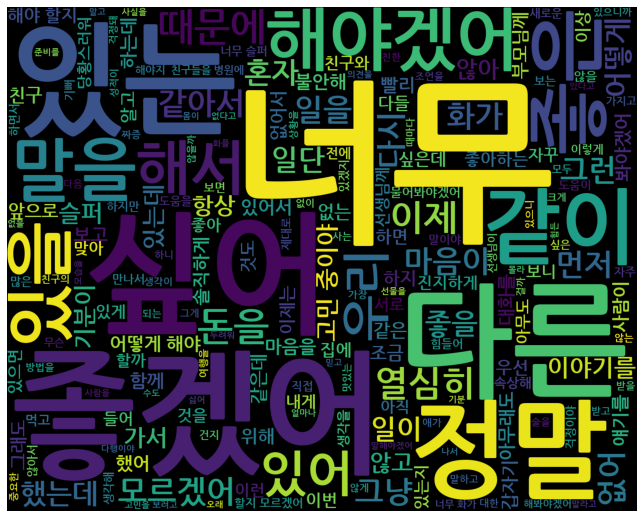

In [64]:
for val in df['human_document']:

  # 문장을 string 형식으로 변환
  val = str(val)

  # 문장 토큰화
  tokens = val.split()

  tokenized_text.append(tokens) # 위에서 만들어 놓은 tokenized_text에 tokens 더함
  comment_words += " ".join(tokens)+" " # 위에서 만들어놓은 comment_words에 tokens 결합

wordcloud = WordCloud(width=1500, height=1200,
                      font_path = 'AppleGothic.ttf',
                      background_color ='black',
                      stopwords = stopwords,
                      min_font_size=10).generate(comment_words) # color_map은 unexpected 되서 일단 제거해줌 #Set2

# plot WordCloud image
plt.figure(figsize=(10,7), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [65]:
wordcloud.to_file('wordcloud.jpg') # 위에 생성한 wordcloud를 파일로 저장 # .to_file()

In [66]:
tokenized_text[0] # tokenized_text가 잘 형성되었는지 확인

['고등학교에',
 '올라오니',
 '중학교',
 '때보다',
 '수업이',
 '갑자기',
 '어려워져서',
 '당황스러워.',
 '아직',
 '학기',
 '초인데',
 '내가',
 '수업에',
 '잘',
 '따라갈',
 '수',
 '있을지',
 '걱정돼.',
 '중학교',
 '수업을',
 '들을',
 '때보다',
 '훨씬',
 '더',
 '열심히',
 '할',
 '거야.',
 '선생님이',
 '강조하신',
 '부분을',
 '필기하고',
 '집에서',
 '매일',
 '수업',
 '내용을',
 '복습하려고',
 '해.']

In [67]:
print(f'토큰화된 문장은 총 {len(tokenized_text)}개이다.')

토큰화된 문장은 총 1497개이다.


In [68]:
# 불용어 필터 함수 형성
def filter_stopwords(tokenized_text, stopword2):
  '''
  토큰화된 텍스트에 새로 추가 할 불용어 리스트를 추가한다.
  '''
  tokenized_filtered =[] # 불용어 필터 리스트 생성

  for i in tokenized_text: # 토큰화된 텍스트를 순차적으로
    for word in i:  # 토큰화된 텍스트 안의 단어가
      if word not in stopwords: # 만약 stopword가 아니면,
        tokenized_filtered.append(word) # 불용어 필터 리스트에 단어를 추가해준다

  return tokenized_filtered

In [69]:
# 위에서 정의한 불용어 필터 함수를 적용
tokenized_filtered = filter_stopwords(tokenized_text, stopwords2)

tokenized_filtered[0:10] #10개 출력해보기

['고등학교에', '올라오니', '중학교', '때보다', '수업이', '갑자기', '어려워져서', '당황스러워.', '아직', '학기']

--> 불용어가 제거되었음을 확인할 수 있다.

In [70]:
print(f'불용어 필터를 적용한 후의 토큰의 개수는 {len(tokenized_filtered)}개 이다.')

불용어 필터를 적용한 후의 토큰의 개수는 44762개 이다.


정제한 토큰을 시각화


- import operator를 통해 연산하는 방식과 collections의 Counter를 불러와 연산하는 방식 중에 고민했음 </br>
  --> import operator 방식을 적용해보겠음
  --> Bert를 사용할 것인데 문장을 넣어줘야 함

In [71]:
import operator

def word_count(tokenized_data):
  word_counter ={}

  for i in tokenized_data:
    if i in word_counter.keys():
      word_counter[i] += 1
    else:
      word_counter[i] =1
  
  sorted_dict = dict(sorted(word_counter.items(),
                            key=operator.itemgetter(1), reverse=True))
  return sorted_dict

In [72]:
tokenized_dict = word_count(tokenized_filtered)

In [73]:
# 상위 30개 단어 추출
def top_30(tokenized_dict):
  top_30_words = list(tokenized_dict.items())[:30] # 딕셔너리(dictionary)는 items()함수: 딕셔너리에 있는 키와 값들의 쌍을 얻을 수 있음
  return top_30_words

In [74]:
top_30(tokenized_dict)

[('너무', 576),
 ('더', 402),
 ('안', 360),
 ('잘', 297),
 ('좋겠어.', 297),
 ('거야.', 282),
 ('싶어.', 240),
 ('할', 210),
 ('좀', 177),
 ('어떻게', 158),
 ('다른', 158),
 ('정말', 156),
 ('있는', 156),
 ('좋은', 153),
 ('날', 149),
 ('모르겠어.', 144),
 ('걸', 133),
 ('못', 131),
 ('같이', 130),
 ('우리', 127),
 ('말을', 123),
 ('화가', 122),
 ('열심히', 118),
 ('해서', 117),
 ('해야겠어.', 114),
 ('있을', 114),
 ('왜', 114),
 ('이', 110),
 ('슬퍼.', 109),
 ('때문에', 108)]

In [75]:
#상위 10개 단어 추출
def top_10(tokenized_dict):
  top_10_words = list(tokenized_dict.items())[:10]
  return top_10_words

top10 = top_10(tokenized_dict)

In [76]:
!pip install squarify

In [77]:
top10_df = pd.DataFrame(top10)
top10_df

,0,1
0,너무,576
1,더,402
2,안,360
3,잘,297
4,좋겠어.,297
5,거야.,282
6,싶어.,240
7,할,210
8,좀,177
9,어떻게,158


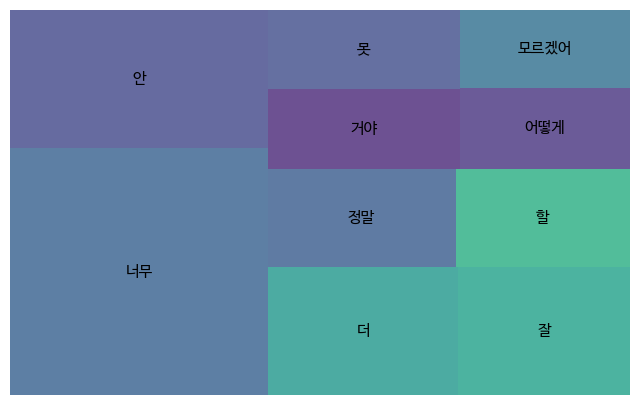

In [78]:
import squarify
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['font.size'] = 11
plt.rc('font', family='NanumBarunGothic') 

sizes = [14557,8165,5568,5020,4230,3932,3505,3485,3143,3019]
labels = ['너무','안','더','잘','정말','할','거야','못','어떻게','모르겠어']

plt.axis('off')
squarify.plot(sizes, label=labels, alpha=0.8)
plt.show()

### BERT 모델 사용 전 준비

BERT에 사용할 모듈 import

In [79]:
!pip install transformers

In [80]:
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, Adafactor, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [81]:
import random
import time
import datetime 

BERT 활용을 위한 GPU

In [82]:
# colab을 사용할 것이기 때문에 colab 내부 GPU를 활용해볼 것임
'''
n_devices = torch.cuda.device_count()
print(n_devices)

for i in range(n_devices):
  print(torch.cuda.get_device_name(i))
'''

'\nn_devices = torch.cuda.device_count()\nprint(n_devices)\n\nfor i in range(n_devices):\n  print(torch.cuda.get_device_name(i))\n'

## BERT 모델링

BERT는 양뱡향성 모델로 Foward, Backward 방식으로 propagate를 수행한다. Context 안에 이전 정보와 다음 단어에 대한 정보가 반영이 될 경우가 더 예측에 더 용이하다. 자연어처리 부문에서 2018년 Bert가 등장한 이후 유명세를 들어보았기 때문에 CNN의 방법이나 다른 모델 대신 Bert를 사용하게 되었다. 한국어 토큰화를 시행해야 하기 때문에 KOBERT를 사용해야 하나 고민하였으나 BERT를 사용할 수 있음을 확인하고 BERT를 사용하게 되었다.

[Bert를 잘 설명하고 있는 글](https://www.quantumdl.com/entry/12%EC%A3%BC%EC%B0%A82-BERT-Pre-training-of-Deep-Bidirectional-Transformers-for-Language-Understanding)을 첨부하였다. </br></br>
또 참고한 자료: </br>
- [Bert 이진분류](http://yonghee.io/bert_binary_classification_naver/)

0. Bert에 맞는 Tag 달기

In [83]:
bert_text = []

for i in for_train['human_document']:
  bert = ["[CLS] "+str(i)+" [SEP]"]
  bert_text.append(bert)

In [84]:
bert_text[:5]

[['[CLS] 고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. 아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼. 중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야. 선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해. [SEP]'],
 ['[CLS] 젊은 시절에 내가 했던 일이 이제 와 한심해. 젊을 때 노느라고 모아놓은 돈이 없어 지금 치료비가 없어 치료를 못 받아. 보험이라도 들어놓았으면 좋았을 것을 후회가 되네. 복지 단체에 도움을 받을 수 있는지 찾아봐야겠어. [SEP]'],
 ['[CLS] 나는 회사에 입사하면 내 삶이 달라질 줄 알았는데 그냥 더 피곤하기만 해. 돈 버는 기계가 된 기분이야. 그렇다고 통장에 돈이 많지도 않고. 일단 사고 싶었던 옷을 하나 살까 봐. 나는 옷을 엄청 좋아해서 옷 쇼핑하는 게 기분 푸는 데에 최고야. [SEP]'],
 ['[CLS] 담임선생님에게 고민을 이야기하면 마음이 편해져. 매번 불쑥 찾아가는데 감사하게도 항상 웃으면서 내 이야기를 들어줘. 지금 마음을 담아 문자를 보내야겠어. 내 마음을 알고 기뻐하실 거야. [SEP]'],
 ['[CLS] 딸이 대기업에 취업하려면 오백만 원이 필요하다고 하는데 혹시 사기가 아닐까 걱정이 되네. 내가 안 도와주면 대출한다고 해서 더 불안해. 어떻게 말리는 게 좋을까? 그 말을 한 회사 관계자를 같이 만나보자고 해야겠어. 내가 이런 부분은 잘 모르니 사회 생활을 오래 한 친구에게 조언을 구해보면 좋을 거 같아. [SEP]']]

토큰화가 되지 않은 document를 넣어주었고, [CLS]와 [SEP] 사이에 문장이 들어가 있음을 발견할 수 있다. 시작과 끝을 나타낸다. </br>
같은 상황 속에 발생하였기 때문에 따로 분리해주지 않고 그대로 진행했다.

In [85]:
# validation dataset에도 Tag 달기
val_text = []

for i in for_validation['human_document']:
  bert = ["[CLS] "+str(i)+" [SEP]"]
  val_text.append(bert)

In [86]:
val_text[:5]

[['[CLS] 저녁때 가족들이 모여서 식사하는데 엄마가 옷에 밥풀이 묻었다고 해서 부끄러웠어. 가족들이 다 있는 앞에서 지적을 당하니까 어린애 같이 느껴져서 창피했어. 엄마한테 실수에 대해 다른 방식으로 얘기해 달라고 얘기를 해 볼까 싶어. 다음에 이런 일이 또 있을 때는 엄마가 나한테 조용히 말해주셨으면 좋겠어. [SEP]'],
 ['[CLS] 취업 못 하는 친구들을 비하하는 사람이 있는데 더 이상 친구로는 지낼 수 없을 것 같아. 응. 취업을 못 할 수도 있는 건데 계속 그걸 가지고 사람을 깎아 내리니까. 그 사람한테 내 생각을 얘기해보려고. 취업난이 심각한 상황에 무작정 취준생을 비하하는 건 물정을 모르는 것 같다고 상처주지 말라고 해야지. [SEP]'],
 ['[CLS] 우리 아들이 자기가 남자인지 잘 모르겠다고 했어. 성 정체성에 혼란이 왔나 봐. 아들 핸드폰에 남자랑 스킨십하는 사진이 엄청 많았어. 너무 충격적이고 혼란스러워. 아들과 한 번 진솔한 대화를 나누어봐야겠어. 아들의 솔직한 마음과 진지한 이야기를 들을 수 있을거야. [SEP]'],
 ['[CLS] 내가 모든 노력을 투자한 업무가 무의미해져 버려서 너무 슬퍼. 응. 내 시간까지 다 써가면서 정말 공들여 투자했던 업무인데 말이야. 우선 프로젝트 한다고 그동안 만나지 못했던 친구들을 만나야겠어. 좋아하는 미드 새로운 시즌도 봐야지. [SEP]'],
 ['[CLS] 아들이 실업계 고등학교를 가서 빨리 취업하고 싶다고 했는데 그렇게 하라고 할 걸 그랬어. 아들이 일반 고등학교에 적응을 잘 못 해서 힘들어하네. 내가 아들을 힘들게 한 것 같아 후회가 돼. 지금이라도 아들과 솔직하게 이야기를 해보고 내가 지원할 것이 있으면 해주어야 마음이 편할 것 같아. 맛있는 거라도 먹이면서 도와줄 거 없냐고 물어봐야겠어. [SEP]']]

1. Bert multillingual 모델에 있는 tokenizer 활용하여 토큰화

In [87]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased',do_lower_case=False)
tokenized_data = []
for i in bert_text:
  for j in i:
    tokens = tokenizer.tokenize(j)
    tokenized_data.append(tokens)

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [91]:
print(tokenized_data[0:3])

[['[CLS]', '고', '##등학교', '##에', '올', '##라', '##오', '##니', '중', '##학교', '때', '##보다', '수', '##업', '##이', '갑', '##자', '##기', '어', '##려', '##워', '##져', '##서', '당', '##황', '##스', '##러', '##워', '.', '아', '##직', '학', '##기', '초', '##인', '##데', '내', '##가', '수', '##업', '##에', '잘', '따라', '##갈', '수', '있을', '##지', '걱', '##정', '##돼', '.', '중', '##학교', '수', '##업을', '들', '##을', '때', '##보다', '훨', '##씬', '더', '열', '##심', '##히', '할', '거', '##야', '.', '선', '##생', '##님', '##이', '강', '##조', '##하', '##신', '부', '##분을', '필', '##기', '##하고', '집', '##에서', '매', '##일', '수', '##업', '내', '##용을', '복', '##습', '##하', '##려', '##고', '해', '.', '[SEP]'], ['[CLS]', '젊', '##은', '시', '##절', '##에', '내', '##가', '했', '##던', '일', '##이', '이', '##제', '와', '한', '##심', '##해', '.', '젊', '##을', '때', '노', '##느', '##라고', '모', '##아', '##놓', '##은', '돈', '##이', '없', '##어', '지', '##금', '치', '##료', '##비', '##가', '없', '##어', '치', '##료', '##를', '못', '받아', '.', '보', '##험', '##이', '##라', '##도', '들어', '##놓', '##았', '##으면', '좋', '##았', '##을', '것을', 

In [92]:
tokenized_val_data =[]
for i in val_text:
  for j in i:
    tokens = tokenizer.tokenize(j)
    tokenized_val_data.append(tokens)

In [93]:
print(tokenized_val_data[0:3])

[['[CLS]', '저', '##녁', '##때', '가', '##족', '##들이', '모', '##여', '##서', '식', '##사', '##하는', '##데', '엄', '##마', '##가', '옷', '##에', '밥', '##풀', '##이', '묻', '##었다', '##고', '해', '##서', '부', '##끄', '##러', '##웠', '##어', '.', '가', '##족', '##들이', '다', '있는', '앞', '##에서', '지', '##적을', '당', '##하', '##니', '##까', '어린', '##애', '같이', '느', '##껴', '##져', '##서', '창', '##피', '##했', '##어', '.', '엄', '##마', '##한', '##테', '실', '##수', '##에', '대해', '다른', '방', '##식으로', '얘', '##기', '##해', '달', '##라고', '얘', '##기를', '해', '볼', '##까', '싶', '##어', '.', '다음', '##에', '이런', '일', '##이', '또', '있을', '때', '##는', '엄', '##마', '##가', '나', '##한', '##테', '조', '##용', '##히', '말', '##해', '##주', '##셨', '##으면', '좋', '##겠', '##어', '.', '[SEP]'], ['[CLS]', '취', '##업', '못', '하는', '친', '##구', '##들을', '비', '##하', '##하는', '사람이', '있는데', '더', '이상', '친', '##구', '##로는', '지', '##낼', '수', '없', '##을', '것', '같', '##아', '.', '응', '.', '취', '##업을', '못', '할', '수도', '있는', '건', '##데', '계속', '그', '##걸', '가지고', '사', '##람', '##을', '깎', '##아', '내', '##리', '#

tokenizer를 통해 token화된 결과에서 ##이 붙은 결과가 나타난다. 이는 subword라는 해결책을 사용했기 때문인데, 토큰화의 가장 큰 문제점이 OOV 문제였다. OOV를 해결하기 위해 단어사전을 만들기도 하는데, 위에서 토큰화를 진행했듯 굉장한 노동력이 필요하다. Subword 방식에는 wordpiece, byte pair encoding 등 다양한 방식이 있다한다. Bert논문에서는 wordpiece 방식을 사용하고 있는데, 한국어 모델을 사용하기 위해서 bert multilingual 모델을 사용해야 한다고 한다. [참조](https://ai-information.blogspot.com/2019/04/bert-embedding.html) 토큰들이 <unk>처리가 된다고 한다. 따라서 bert multilingual 모델 내부의 tokenizer를 사용하였고, 토큰화가 된 것을 확인할 수 있다.

2. padding 작업 진행

가장자리의 정보들을 잘 활용하기 위해 패딩을 진행한다. 또한 기계는 동일한 길이의 문서들에 대해 하나의 행렬로 보고 한 번에 처리할 수 있다. 

1) 정수로 인코딩 : tokenizer.convert_tokens_to_ids()

    tokenizer.convert_tokens_to_ids(): token string 또는 token string의 리스트를 token id 또는 Token id의 리스트로 변환하는 함수

In [94]:
# 먼저 train 데이터를 정수로 인코딩
input_ids = []
for i in tokenized_data:
  ids = tokenizer.convert_tokens_to_ids(i)
  input_ids.append(ids)

In [95]:
# val 데이터 역시 정수로 인코딩
input_val_ids = []
for i in tokenized_data:
  ids = tokenizer.convert_tokens_to_ids(i)
  input_val_ids.append(ids)

2) 길이 제한 및 패딩 처리 : pad_sequences() </br>
- maxlen 설정

In [96]:
print(input_ids[0]) #train 패딩 영역 점검(확인)

[101, 8888, 55511, 10530, 9583, 17342, 28188, 25503, 9694, 46599, 9137, 80001, 9460, 26784, 10739, 8849, 13764, 12310, 9546, 26737, 69592, 41584, 12424, 9067, 65649, 12605, 30873, 69592, 119, 9519, 33077, 9953, 12310, 9757, 12030, 28911, 8996, 11287, 9460, 26784, 10530, 9654, 22799, 101202, 9460, 68943, 12508, 8864, 16605, 118798, 119, 9694, 46599, 9460, 75203, 9117, 10622, 9137, 80001, 10008, 119109, 9074, 9569, 71013, 18108, 9955, 8863, 21711, 119, 9428, 24017, 108578, 10739, 8853, 20626, 35506, 25387, 9365, 97005, 9949, 12310, 12453, 9711, 11489, 9258, 18392, 9460, 26784, 8996, 72444, 9357, 119081, 35506, 26737, 11664, 9960, 119, 102]


In [97]:
print(input_val_ids[0]) #val 패딩 영역 점검(확인)

[101, 8888, 55511, 10530, 9583, 17342, 28188, 25503, 9694, 46599, 9137, 80001, 9460, 26784, 10739, 8849, 13764, 12310, 9546, 26737, 69592, 41584, 12424, 9067, 65649, 12605, 30873, 69592, 119, 9519, 33077, 9953, 12310, 9757, 12030, 28911, 8996, 11287, 9460, 26784, 10530, 9654, 22799, 101202, 9460, 68943, 12508, 8864, 16605, 118798, 119, 9694, 46599, 9460, 75203, 9117, 10622, 9137, 80001, 10008, 119109, 9074, 9569, 71013, 18108, 9955, 8863, 21711, 119, 9428, 24017, 108578, 10739, 8853, 20626, 35506, 25387, 9365, 97005, 9949, 12310, 12453, 9711, 11489, 9258, 18392, 9460, 26784, 8996, 72444, 9357, 119081, 35506, 26737, 11664, 9960, 119, 102]


In [101]:
max_len = 128 # 설정한 max_len만큼 빈 공간을 0으로 채운다.
input_ids = pad_sequences(input_ids, maxlen=max_len, dtype='long', truncating='post',padding='post') # 문장길이 제한 및 패딩 # truncating: remove values from sequences larger than maxlen

In [102]:
input_ids[0] # 패딩이 잘 완료되었는지 확인. 빈 공간 0으로 채워졌나

array([   101,   8888,  55511,  10530,   9583,  17342,  28188,  25503,
         9694,  46599,   9137,  80001,   9460,  26784,  10739,   8849,
        13764,  12310,   9546,  26737,  69592,  41584,  12424,   9067,
        65649,  12605,  30873,  69592,    119,   9519,  33077,   9953,
        12310,   9757,  12030,  28911,   8996,  11287,   9460,  26784,
        10530,   9654,  22799, 101202,   9460,  68943,  12508,   8864,
        16605, 118798,    119,   9694,  46599,   9460,  75203,   9117,
        10622,   9137,  80001,  10008, 119109,   9074,   9569,  71013,
        18108,   9955,   8863,  21711,    119,   9428,  24017, 108578,
        10739,   8853,  20626,  35506,  25387,   9365,  97005,   9949,
        12310,  12453,   9711,  11489,   9258,  18392,   9460,  26784,
         8996,  72444,   9357, 119081,  35506,  26737,  11664,   9960,
          119,    102,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [103]:
# val에도 패딩 진행
input_val_ids = pad_sequences(input_val_ids, maxlen=max_len, dtype='long', truncating='post', padding='post') 

In [104]:
input_val_ids[0] # val에도 패딩이 잘 완료되었는지 확인. 빈 공간 0으로 채워졌나

array([   101,   8888,  55511,  10530,   9583,  17342,  28188,  25503,
         9694,  46599,   9137,  80001,   9460,  26784,  10739,   8849,
        13764,  12310,   9546,  26737,  69592,  41584,  12424,   9067,
        65649,  12605,  30873,  69592,    119,   9519,  33077,   9953,
        12310,   9757,  12030,  28911,   8996,  11287,   9460,  26784,
        10530,   9654,  22799, 101202,   9460,  68943,  12508,   8864,
        16605, 118798,    119,   9694,  46599,   9460,  75203,   9117,
        10622,   9137,  80001,  10008, 119109,   9074,   9569,  71013,
        18108,   9955,   8863,  21711,    119,   9428,  24017, 108578,
        10739,   8853,  20626,  35506,  25387,   9365,  97005,   9949,
        12310,  12453,   9711,  11489,   9258,  18392,   9460,  26784,
         8996,  72444,   9357, 119081,  35506,  26737,  11664,   9960,
          119,    102,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

3) 마스킹 준비